In [1]:
from __future__ import print_function
import numpy as np
import os
import sys
import requests
from operator import add
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pandas as pd
import time
import matplotlib.pyplot as plt


In [1]:
sc = SparkContext.getOrCreate()
#read file
movies = sc.textFile('C:/Users/Yidow/Desktop/cs777-new/FengYiduo_Assignment_1/ml-10M100K/movies.dat')
movies = movies.map(lambda line: line.split("::"))

ratings = sc.textFile('C:/Users/Yidow/Desktop/cs777-new/FengYiduo_Assignment_1/ml-10M100K/ratings.dat')
ratings = ratings.map(lambda line: line.split("::"))

rate_tmp = ratings.map(lambda x: (x[1],float(x[2])))
rate_tmp = rate_tmp.mapValues(lambda v: (v, 1)) \
    .reduceByKey(lambda a,b: (a[0]+b[0], a[1]+b[1])) \
    .mapValues(lambda v: v[0]/v[1])

# rate_tmp =rate_tmp.reduceByKey(add)
print(rate_tmp.collect())
# movies = pd.read_table('C:/Users/Yidow/Desktop/cs777-new/FengYiduo_Assignment_1/ml-10M100K/movies.dat')
# ratings = pd.read_table('C:/Users/Yidow/Desktop/cs777-new/FengYiduo_Assignment_1/ml-10M100K/ratings.dat')
#
# # rating = []
# # with open('C:/Users/Yidow/Desktop/cs777-new/FengYiduo_Assignment_1/ml-10M100K/ratings.dat','r')as file:
# #     for line in file:
# #         cur = line.split("::")
#         rating.append([cur[1],cur[2]])

NameError: name 'SparkContext' is not defined

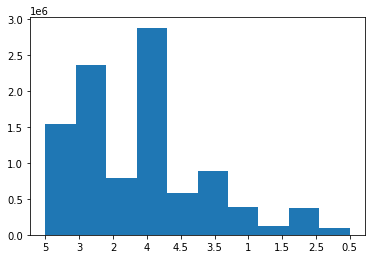

In [3]:
x=[]
y=[]
with open('C:/Users/Yidow/Desktop/cs777-new/FengYiduo_Assignment_1/ml-10M100K/ratings.dat','r')as file:
    for line in file:
        cur = line.split("::")
        x.append(cur[1])
        y.append(cur[2])
plt.hist(y)
plt.show()

##Task 1 : Top-10 Active Taxis (5 points)
Many different taxis have had multiple drivers. Write and execute a Python program that computes the top ten taxis that have had the largest number of drivers. Your output should be a set of (medallion, number of drivers) pairs.
Note: You should consider that this is a real world data set that might include wrongly formatted data lines. You should clean up the data before the main processing, a line might not include all of the fields. If a data line is not correctly formatted, you should drop that line and do not consider it.
Report the processing time of the task as well.

In [12]:
time_start = time.time()
#start spark
sc = SparkContext.getOrCreate()
#read file
file = sc.textFile("C:/Users/Yidow/Desktop/cs777-new/taxi-data-sorted-small.csv")
#split line
file = file.map(lambda line: line.split(","))
#medallion and hack license

ids = file.map(lambda x:((x[0],x[1]))).distinct()
ids = ids.map(lambda line: (line[0],1))
re1 = ids.reduceByKey(add).top(10,lambda x:x[1])

print(re1)

time_end = time.time()
runTime = time_end-time_start
print(runTime)


[('65EFB7D02BAD12D5DE757CB5D350944E', 20), ('3C08296D0EB7ABE24FB7328DE9B62813', 20), ('799153A138F4E8334A1A95AE25040B83', 19), ('F36564AB9C6EA3B6373EB0E1680A447A', 19), ('3B6AE3CF05F34ADC91DC68D20F2EB913', 19), ('55D311AD2752BC278BEF7386B25B28A9', 19), ('7DEB25123AE57111F912C0EBF92F1F63', 19), ('CD7B02776E69483397952DC5E1F44DFE', 19), ('F2A08960199BCDB7EE19411A8E7A4C5D', 18), ('6B15D153B49701AD86A2E62468990B73', 18)]
26.245346069335938


In [57]:
 #stop spark
sc.stop()

##Task 2 - Top-10 Best Drivers (7 Points)
We would like to figure out who the top 10 best drivers are in terms of their average earned money per minute spent carrying a customer. The total amount field is the total money earned on a trip. In the end, we are interested in computing a set of (driver, money per minute) pairs.
Report the processing time of the task as well.


In [25]:
#Exception Handling and removing wrong datalines
def isfloat(value):
    try:
        float(value)
        return True

    except:
         return False
def correctRows(p):
    if(len(p)==17):
        if(isfloat(p[5]) and isfloat(p[11])):
            if(float(p[4])> 60 and float(p[5])>0 and float(p[11])> 0 and float(p[16])> 0):
                return p
    return 0


time_start = time.time()
sc = SparkContext.getOrCreate();
#read file
file = sc.textFile("C:/Users/Yidow/Desktop/cs777-new/taxi-data-sorted-small.csv")
#split line
file = file.map(lambda line: line.split(",")).filter(correctRows)

re2 = file.filter(lambda x: x != '0')
re2 = re2.map(lambda line: (line[1], float(line[16])/(float(line[4])/60) if float(line[4])/60 else 0))
re2 = re2.aggregateByKey((0,0), lambda a,b: (a[0] + b,    a[1] + 1),
                                       lambda a,b: (a[0] + b[0], a[1] + b[1]))
re2 = re2.mapValues(lambda x: x[0]/x[1])
re2 = re2.top(10, key=lambda p: p[1])

print(re2)

# re2 = file.filter(lambda x: x != '0')
# re21 = re2.map(lambda x: (x[1],float(x[16]))).reduceByKey(add)
# re22 = re2.map(lambda x: (x[1],(float(x[4])/60) if float(x[4])/60 else 0)).reduceByKey(add)
# re23 = re21.join(re22)
# re24 = re23.map(lambda x:(x[0], (x[1][0]/x[1][1] if x[1][1]!=0 else 0)))
# print(re24.top(10, key=lambda x: x[1]))

time_end = time.time()
runTime = time_end-time_start
print(runTime)

[('32187D24B8C6D9DC9B1254330292F42E', 45.33626373626374), ('7930AF3429B99C59346390635AFDFFCF', 37.31236942250107), ('011AE79C7E609378068514E5C992B6D6', 31.47058823529412), ('583D58A6E31DBAF275DDFAD1857448D2', 26.619718309859156), ('C42ABFD8903E6A5B2E81EA6331B05700', 22.25260749613081), ('C742CFD86A6B2ABFB9CD7228286766CA', 17.313432835820894), ('62A757062319F29FA98D15C8DF8A6BF6', 13.844295302013423), ('7BDFF06419C23F667C5D69EEFBF091BE', 11.313253012048193), ('7F274F176A7BA8D55B5A7D0F2580634C', 7.301946902654868), ('BD50C5800362CB05615C52A0370E1A80', 7.247362012987013)]
22.648643255233765


##Task 3 - Best time of the day to Work on Taxi (8 Points)
We would like to know which hour of the day is the best time for drivers that has the highest profit per miles. Consider the surcharge amount in dollar for each taxi ride (without tip amount) and the distance in miles, and sum up the rides for each hour of the day (24 hours) – consider the pickup time for your calculation. The profit ratio is the ration surcharge in dollar divided by the travel distance in miles for each specific time of the day.
Profit Ratio = (Surcharge Amount in US Dollar) / (Travel Distance in miles) We are interested to know the time of the day that has the highest profit ratio.
Report the processing time of the task as well.


In [28]:
#Exception Handling and removing wrong datalines
def isfloat(value):
    try:
        float(value)
        return True

    except:
         return False
def correctRows(p):
    if(len(p)==17):
        if(isfloat(p[5]) and isfloat(p[11])):
            if(float(p[4])> 60 and float(p[5])>0 and float(p[11])> 0 and float(p[16])> 0):
                return p
    return 0

time_start = time.time()
sc = SparkContext.getOrCreate();
#read file
file = sc.textFile("C:/Users/Yidow/Desktop/cs777-new/taxi-data-sorted-small.csv")
#split line
file = file.map(lambda line: line.split(",")).filter(correctRows)
re3 = file.filter(lambda x: x != '0')
re3 = file.map(lambda x: (x[2], float(x[12])/float(x[5])))
re3 = re3.top(10, key=lambda p: p[1])
print(re3)

time_end = time.time()
runTime = time_end-time_start
print(runTime)

[('2013-01-02 17:09:00', 100.0), ('2013-01-02 19:59:00', 100.0), ('2013-01-03 19:43:00', 100.0), ('2013-01-04 16:32:00', 100.0), ('2013-01-04 17:20:00', 100.0), ('2013-01-04 17:34:00', 100.0), ('2013-01-14 16:18:00', 100.0), ('2013-01-14 16:46:00', 100.0), ('2013-01-15 17:06:00', 100.0), ('2013-01-15 17:46:00', 100.0)]
11.401250839233398


According to the results above, 17-18 is the best time for taxi.